# 08_mean_sd_tail_index_turnover_consecutive19-11

In [1]:
import numpy as np
import pandas as pd
import fs_qe as fq

# 1 data process

The imported sample is constructed with the strategy that picking up the US firm with firm-size (turnover/operational revenue) data consecutively from 2019 to 2011. For details, please see the file ``03``.

In [2]:
df, df2, df3, df4 = fq.dataprocess(file='data/US_revenue.csv', var1='logturnover', var2='turnover', var3='turnover_mean')

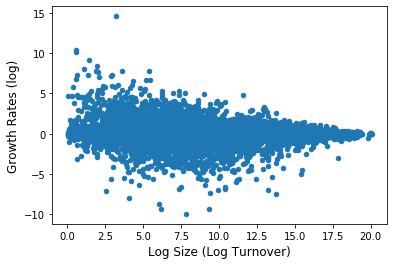

In [3]:
fq.scatterplot(df, x='logturnover', xlabel='Log Size (Log Turnover)')

In [4]:
df5 = df2[df2['quantile_ex_1'] == pd.Interval(0.0188, 7.384, closed='right') ]
df6 = df2[df2['quantile_ex_1'] == pd.Interval(7.384, 8.927, closed='right') ]
df7 = df2[df2['quantile_ex_1'] == pd.Interval(8.927, 11.435, closed='right') ]
df8 = df2[df2['quantile_ex_1'] == pd.Interval(11.435, 20.059, closed='right') ]

In [5]:
draw1 = np.array(round(df5['fgrow_log'], ndigits=2))
draw2 = np.array(round(df6['fgrow_log'], ndigits=2))
draw3 = np.array(round(df7['fgrow_log'], ndigits=2))
draw4 = np.array(round(df8['fgrow_log'], ndigits=2))
draw1

array([ 0.08, -0.17, -0.04, ...,  0.06,  0.08,  0.1 ])

# 2 bar graphs and PDFs

## 2.1 bar graphs for mean and standard deviation of firm growth 

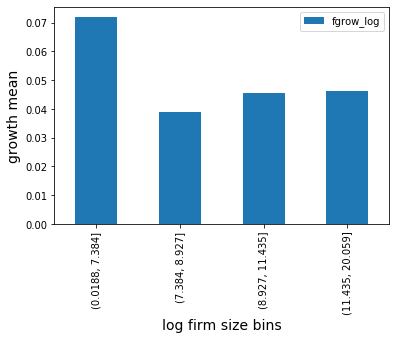

In [12]:
fq.plotbars(df3)

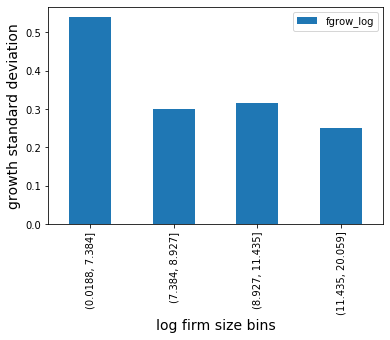

In [13]:
fq.plotbars(df4, ylabel='growth standard deviation')

## 2.2 PDFs for growth of firms in 4 bins above, respectively

The ``empirical func1`` shows the empirical PDF functions of firm growth for firms in **bin 1** above.

The ``empirical func2`` shows the empirical PDF functions of firm growth for firms in **bin 2** above.

The ``empirical func3`` shows the empirical PDF functions of firm growth for firms in **bin 3** above.

The ``empirical func4`` shows the empirical PDF functions of firm growth for firms in **bin 4** above.

In [14]:
d1 = fq.generating_pdf(draw1)
d2 = fq.generating_pdf(draw2)
d3 = fq.generating_pdf(draw3)
d4 = fq.generating_pdf(draw4)

In [15]:
x1 = d1['fgrow_mean']
x2 = d2['fgrow_mean']
x3 = d3['fgrow_mean']
x4 = d4['fgrow_mean']

y1 = d1['prob']
y2 = d2['prob']
y3 = d3['prob']
y4 = d4['prob']

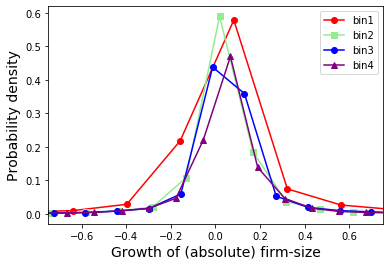

In [16]:
fq.density_plot(x1, x2, x3, x4, y1, y2, y3, y4)

# 3 tail index

In [17]:
s_dist1 = df.turnover
s_dist2 = df.logturnover
s_dist3 = df.fgrow_log


The tail index for firm size distribution with firm size measured by turnover/operational revenue is

In [18]:
fq.gabaix_est(s_dist1, c=0.01)

1.649436047168231

The tail index for log firm size distribution with firm size measured by turnover/operational revenue is

In [19]:
fq.gabaix_est(s_dist2, c=0.01)

29.366506763405408

The tail index for firm growth distribution with firm size measured by turnover/operational revenue is

In [20]:
fq.gabaix_est(s_dist3, c=0.01)

2.3253681792434717

## 3.3 tail index for firm size distribution yearly from 2010 to 2019

In [21]:
n = 2010
N = 2019
while n <= N:
    x = df[df['year'] == n].turnover
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 1.6189353570716822
Tail index in year 2012 is 1.6072683672468497
Tail index in year 2013 is 1.645615891657513
Tail index in year 2014 is 1.6738801182254401
Tail index in year 2015 is 1.6801345939576544
Tail index in year 2016 is 1.6252941413889301
Tail index in year 2017 is 1.6191304426476492
Tail index in year 2018 is 1.64478732629612
None in year 2019


## 3.4 tail index for log firm size distribution yearly from 2010 to 2019

In [22]:
n = 2010
N = 2019
while n <= N:
    x = df[df['year'] == n].logturnover
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 28.77776034158279
Tail index in year 2012 is 28.559002923997454
Tail index in year 2013 is 29.288959765440936
Tail index in year 2014 is 29.820225069077505
Tail index in year 2015 is 29.872567876761376
Tail index in year 2016 is 28.881834670075083
Tail index in year 2017 is 28.870249363422886
Tail index in year 2018 is 29.491947139209447
None in year 2019


## 3.5 tail index for firm growth distribution yearly from 2010 to 2019

In [23]:
n = 2010
N = 2019
while n <= N:
    x = df[df['year'] == n].fgrow_log
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 2.3847130129532235
Tail index in year 2012 is 2.388323936243259
Tail index in year 2013 is 2.3333314753055294
Tail index in year 2014 is 2.2040158864359256
Tail index in year 2015 is 2.2989650185828365
Tail index in year 2016 is 2.194362229535227
Tail index in year 2017 is 2.3447369298969996
Tail index in year 2018 is 2.241016574464574
None in year 2019
